Linear Regression - MAE: 8.02207182558268, MSE: 114.25968842634968, R2: 0.4776938726167961
Decision Tree - MAE: 8.516666666666605, MSE: 121.52505668934205, R2: 0.4444822788016911
Random Forest - MAE: 8.563203968253948, MSE: 126.66358132353601, R2: 0.4209929542716401
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 338986336.0000 - val_loss: 285652480.0000
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 277750912.0000 - val_loss: 236464000.0000
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 229943280.0000 - val_loss: 195611264.0000
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 189992800.0000 - val_loss: 159160128.0000
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 153955392.0000 - val_loss: 125896800.0000
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 121287488.0000 - val_loss: 96510944.0000
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 92686608.0000 - val_loss: 71954104.0000
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 68588512.0000 - val_loss: 50613752.0000
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 47786476.0000 - val_loss: 32904016.0000
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 30661128.0000 - val_loss: 19120864.0000
Epoch 11/50
3/3 ━━━━━━━━━━━━

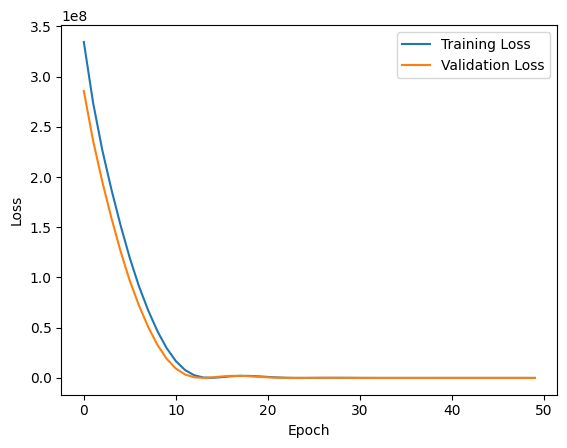

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Neural Network - MAE: 8.86376953125, MSE: 119.69758205413818, R2: 0.4528360962867737
Enter the details to predict appointment date:
Enter requesting date (YYYY-MM-DD): 2024-05-26
Enter provider role (MD/Nurse/Psychologist): MD


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted Appointment Date: DatetimeIndex(['2024-06-06 05:09:22.500000'], dtype='datetime64[ns]', freq=None)


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow import keras
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_excel('Appointment Scheduling Cleaned Data.xlsx')

# Feature Engineering
# Convert 'Requesting date' and 'Appointment date' to datetime objects
data['Requesting date'] = pd.to_datetime(data['Requesting date'])
data['Appointment date'] = pd.to_datetime(data['Appointment date'])

# Convert 'Requesting date' to the number of days since a reference date (e.g., 1970-01-01)
data['Requesting date_numeric'] = (data['Requesting date'] - pd.Timestamp('1970-01-01')).dt.days

# Convert 'Appointment date' to the number of days since the same reference date
data['Appointment date_numeric'] = (data['Appointment date'] - pd.Timestamp('1970-01-01')).dt.days

# Map 'Provider Role' to numeric values
provider_role_map = {'Nurse': 1, 'Psychologist': 2, 'MD': 3}
data['Provider Role'] = data['Provider Role'].map(provider_role_map)

# Drop unnecessary columns (keep Requesting date and Provider Role for features)
data_cleaned = data.drop(columns=['Full Name', 'Waiting Time', 'Requesting date', 'Appointment date'])

# Define the features (X) and target (y)
X = data_cleaned[['Requesting date_numeric', 'Provider Role']]  # Features: Requesting date and Provider Role
y = data_cleaned['Appointment date_numeric']  # Target: Appointment date

# Ensure that all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values
X = X.dropna()
y = y.dropna()

# Ensure X and y have the same number of rows
if len(X) != len(y):
    print(f"Inconsistent data: X has {len(X)} rows, y has {len(y)} rows")
    exit()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate models
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MAE: {mae}, MSE: {mse}, R2: {r2}")
    return mae, mse, r2

# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
evaluate_model(linear_model, X_test, y_test, "Linear Regression")

# 2. Decision Tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
evaluate_model(tree_model, X_test, y_test, "Decision Tree")

# 3. Random Forest
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
evaluate_model(forest_model, X_test, y_test, "Random Forest")

# Neural Network Model using Keras
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, verbose=1)

# Plot the loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate Neural Network Model
y_pred_nn = model.predict(X_test)
evaluate_model(model, X_test, y_test, "Neural Network")

# User Test Section: Input new data to predict appointment date
def user_input_prediction():
    print("Enter the details to predict appointment date:")
    requesting_date = input("Enter requesting date (YYYY-MM-DD): ")
    provider_role = input("Enter provider role (MD/Nurse/Psychologist): ")

    # Convert provider role to numeric code
    provider_role_numeric = provider_role_map.get(provider_role, 3)  # Default to MD if input is not recognized

    # Prepare the input data
    requesting_date_numeric = (pd.to_datetime(requesting_date) - pd.Timestamp('1970-01-01')).days
    new_data = {
        'Requesting date_numeric': requesting_date_numeric,
        'Provider Role': provider_role_numeric
    }

    # Convert to dataframe
    new_df = pd.DataFrame([new_data])

    # Ensure the order of columns matches the training data
    new_df = new_df[X_train.columns]

    # Predict the number of days since 1970 for the appointment date
    predicted_appointment_numeric = model.predict(new_df)[0]

    # Post-process: Ensure the predicted appointment date is after the requesting date
    predicted_appointment_numeric = max(predicted_appointment_numeric, requesting_date_numeric)

    # Calculate the predicted appointment date
    predicted_appointment_date = pd.Timestamp('1970-01-01') + pd.to_timedelta(predicted_appointment_numeric, unit='D')
    print(f"Predicted Appointment Date: {predicted_appointment_date}")

# Call the function to test the model with user input
user_input_prediction()


In [ ]:
2024-05-26